RMS size @ source            : 141.42 µm
RMS size @ lens plane        : 227.86 µm
RMS size @ focus (pre‑hole)  :  17.87 µm
RMS size @ after 20 µm hole  :   5.65 µm
RMS size @ grating (final)   : 1008.77 µm


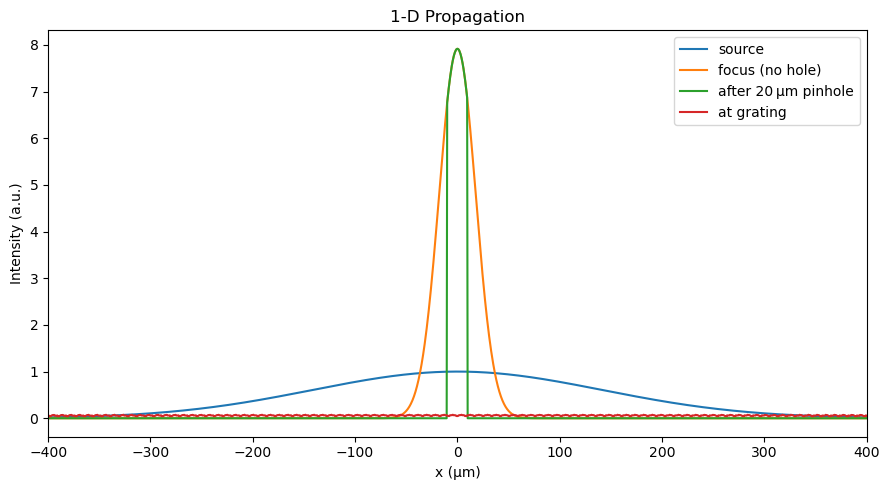

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def propTF(uin_V_m, L_m, lambda_mbda_m, z_m):
    M = uin_V_m.size
    dx = L_m / M
    k = 2*np.pi/lambda_mbda_m

    fx = np.linspace(-1/(2*dx), 1/(2*dx) - 1/L_m, M)   
    H  = np.exp(-1j*np.pi*lambda_mbda_m*z_m*fx**2)           
    H  = np.fft.fftshift(H)

    Uin = np.fft.fft(np.fft.fftshift(uin_V_m))
    Uout = H*Uin
    uout = np.fft.ifftshift(np.fft.ifft(Uout))
    return uout

lambda_m   = 635e-9          # wavelength (m)
sigma_src_m = 200e-6      # source rms size (m)
pin_diam_m  = 20e-6       # pinhole diameter (full width) (m)


z_src_lens_m = 0.500      # source → lens (m)
f_lens_m     = 0.050      # lens focal length (m)   (≈10× demag)
z_lens_pin_m = f_lens_m     # lens → pinhole ≈ focal plane (m)
z_pin_grat_m = 0.080      # pinhole → “grating” plane (m)

# Numerical grid – large enough to contain the beam everywhere
L_m   = 6e-3              # total transverse window (m)
dx_m  = 0.5e-6            # sampling interval (m)
x_m   = np.arange(-L_m/2, L_m/2, dx_m)


E0 = np.exp(-x_m**2/(2*sigma_src_m**2))          # amplitude, RMS = sigma_src


E1 = propTF(E0, L_m, lambda_m, z_src_lens_m)


phi_lens = np.exp(-1j * (2*np.pi/lambda_m)/(2*f_lens_m) * x_m**2)
E2 = E1 * phi_lens


E3 = propTF(E2, L_m, lambda_m, z_lens_pin_m)


aperture = np.abs(x_m) < (pin_diam_m/2)
E4 = E3 * aperture


E5 = propTF(E4, L_m, lambda_m, z_pin_grat_m)


def rms_width(field, x):
    I = np.abs(field)**2
    I /= I.sum()
    xc = np.sum(I * x) # centroid 
    return np.sqrt(np.sum(I * (x - xc)**2))


r0   = rms_width(E0, x_m) * 1e6   # µm
r1   = rms_width(E1, x_m) * 1e6
r3   = rms_width(E3, x_m) * 1e6
r4   = rms_width(E4, x_m) * 1e6
r5   = rms_width(E5, x_m) * 1e6

print(f"RMS size @ source            : {r0:6.2f} µm")
print(f"RMS size @ lens plane        : {r1:6.2f} µm")
print(f"RMS size @ focus (pre‑hole)  : {r3:6.2f} µm")
print(f"RMS size @ after 20 µm hole  : {r4:6.2f} µm")
print(f"RMS size @ grating (final)   : {r5:6.2f} µm")


plt.figure(figsize=(9,5))
plt.plot(x_m*1e6, np.abs(E0)**2,          label='source')
plt.plot(x_m*1e6, np.abs(E3)**2,          label='focus (no hole)')
plt.plot(x_m*1e6, np.abs(E4)**2,          label='after 20 µm pinhole')
plt.plot(x_m*1e6, np.abs(E5)**2,          label='at grating')
plt.xlim(-400, 400)
plt.xlabel('x (µm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('1‑D Propagation')
plt.tight_layout()
plt.show()



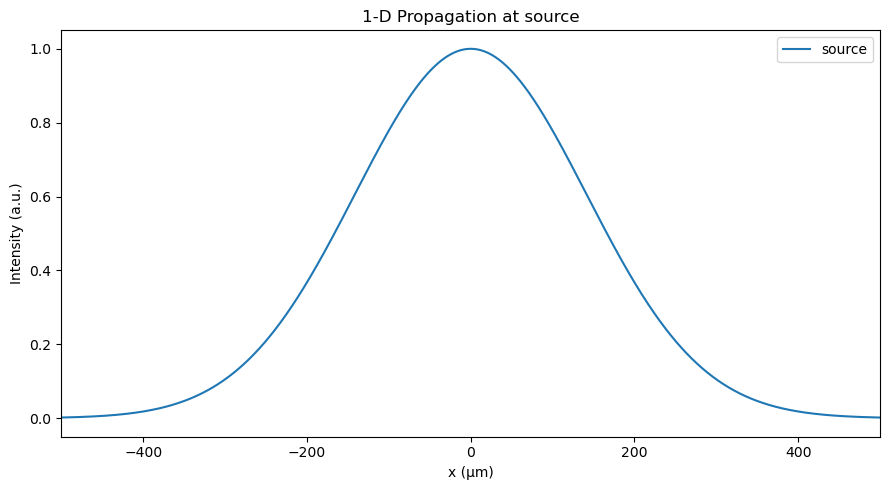

In [13]:
plt.figure(figsize=(9,5))
plt.plot(x_m*1e6, np.abs(E0)**2,          label='source')
plt.xlim(-500, 500)
plt.xlabel('x (µm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('1‑D Propagation at source')
plt.tight_layout()
plt.show()


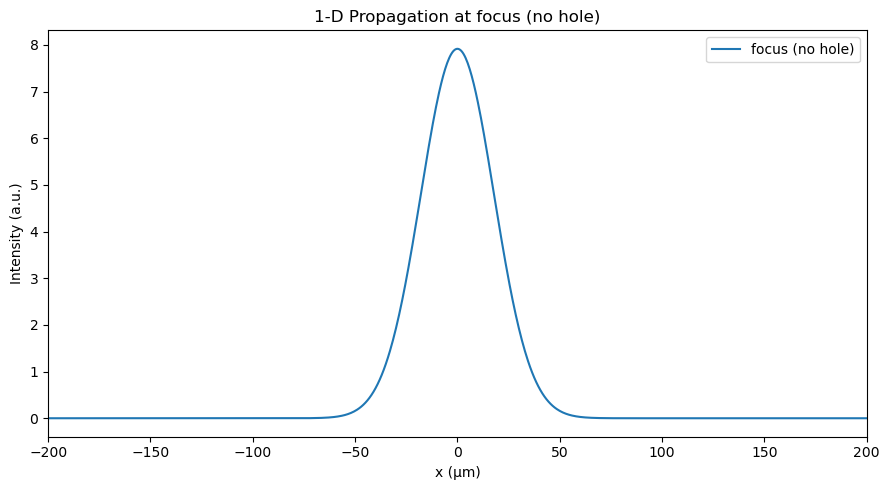

In [18]:
plt.figure(figsize=(9,5))
plt.plot(x_m*1e6, np.abs(E3)**2,          label='focus (no hole)')
plt.xlim(-200, 200)
plt.xlabel('x (µm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('1‑D Propagation at focus (no hole)')
plt.tight_layout()
plt.show()


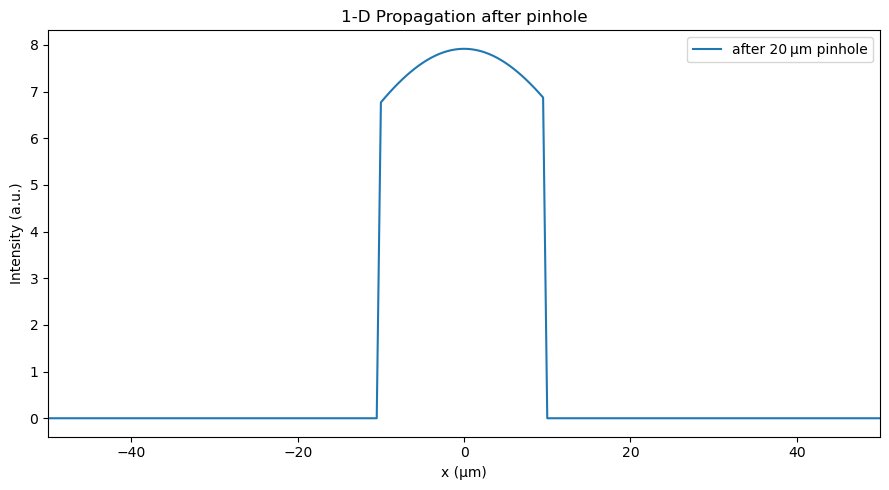

In [19]:
plt.figure(figsize=(9,5))
plt.plot(x_m*1e6, np.abs(E4)**2,          label='after 20 µm pinhole')
plt.xlim(-50, 50)
plt.xlabel('x (µm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('1‑D Propagation after pinhole')
plt.tight_layout()
plt.show()


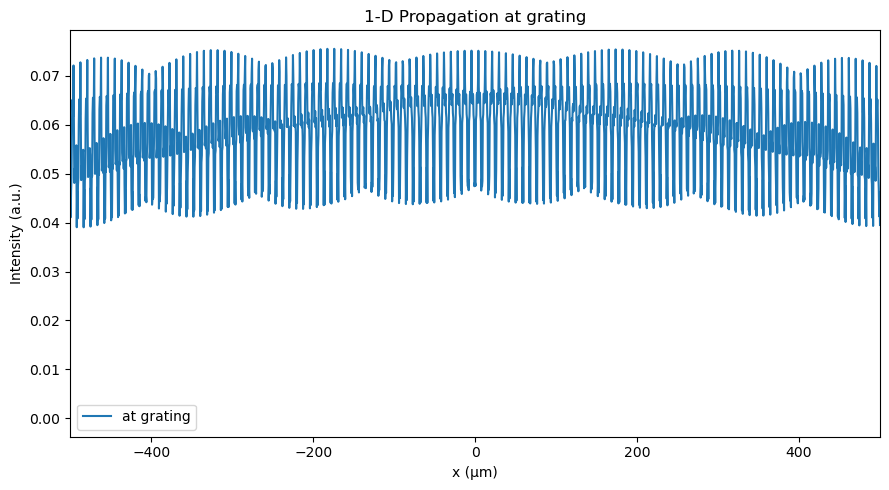

In [16]:
plt.figure(figsize=(9,5))
plt.plot(x_m*1e6, np.abs(E5)**2,          label='at grating')
plt.xlim(-500, 500)
plt.xlabel('x (µm)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.title('1‑D Propagation at grating')
plt.tight_layout()
plt.show()
